# Simulation du jeux de LIDO simplifié
  <h1 align="left"><font color="red">LAYOUNI Amani 2LM3 TP2 </h1>
    <h2 align="left"><font color="BROWN">COMPTE RENDU 2 </h2>

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [165]:
import numpy as np 
# C'est l'importation de la bibliothéque "numpy" pour effectuer des opérations mathématiques et statistiques.

### Simulation du lancé de dé

In [166]:
def Roll():
    return int(np.random.choice(range (1,7),1)) 
#La fonction Roll permet de choisir aléatoirement un entier.

In [167]:
Roll()

5

### Compléter le code et commenter

In [168]:
A=0
#A est la position du pion 
NA=0
#NA est le nb de coups
S=10
#S: position du cible 
temp = Roll()
#temp prend la fonction de Roll() qui donne un nombre aléatoire entre 1 et 6.
NA+=1
while (temp!=6):
    temp=Roll()
    NA+=1
    print(NA, temp)
#repeat roll() jusqu'a avoir 6 avec l'incrementation du  nb de coups 
print("Sorties apres {} coups".format(NA))
while(A != S):
#repeat jusqu'a A=position du cible 'S=10' 
    temp=Roll()
    if temp+A < S:
        A+=temp
        NA+=1
        print(NA, temp, A)
    elif temp+A > S:
        NA+=1
        print(NA, temp, A)
    else:
        A=S
        NA+=1
        print(NA, temp, A)

2 6
Sorties apres 2 coups
3 6 6
4 1 7
5 4 7
6 5 7
7 6 7
8 3 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessaaire pour atteindre la cible

In [169]:
def sim(S):
    A=0 
    NA=0 
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    A=1
    while(A<S):
        temp=Roll()
        if temp+A<S:
            NA+=1
            A+=temp
        elif temp+A>S:
            NA+=1
        else:
            A=S
            NA+=1
    return NA

    

####   -  COMMENTAIRE :
   - la fonction sim() renvoie le nombre de coups NA necessaires pour atteindre la cible S 

In [170]:
sim(10)

7

In [171]:
#simulation 30000 fois 
#s=30
L=[sim(30) for i in range(30000)]
Moy=sum(L)/30000
print('estimation de la moyenne de X_30 = {}'.format(Moy))
# calculer la moyenne de coups jusqu'à atteindre une position cible de s pour un simulation de 30000 

estimation de la moyenne de X_30 = 18.9729


### Simulation de $10^5$  scénario 

In [172]:
x=list(range(10,20))
y=[sum([sim(u) for i in range(10000)])/10000 for u in x] 


####  -  COMMENTAIRE : 
 - x,y sont des listes de dimension egale à 10
 - on simule le jeu puis on calcule la moyenne de chaque simulation et on met le resultat dans la liste y

In [173]:
import matplotlib.pyplot as plt

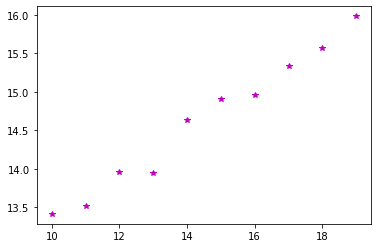

In [174]:
plt.plot(x, y, "m*")
plt.show()

 * les résultats sont représentés dans une courbe d'abscisse x et d'ordonnée y

In [175]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [176]:
slope 
#a 
#pente

0.28982606060606075

In [177]:
intercept
#b

10.417832121212118

In [178]:
yy=[slope *u +intercept for u in x]
#droite y=ax+b

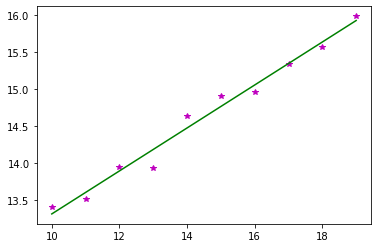

In [179]:
plt.plot(x,y,"*m",x,yy,"-g")
plt.show()

## CONCLUSION : 

- On a executee la simulation pour differentes valeurs de n , pour chaque simulation on a fait l'estimation de la moyenne
- On a calculer la jouabilité de ce jeu 
- On peut conclure que l'ésperance mathématique de Xn est à peut prés egale à 0.2898*$n$+10.417
     - $\mathbb{E}(X_n)$ =~ 0.2898*$n$+10.417

